In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as ss
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r'C:\Users\bkears1\MOCK_DATA3.csv')
data = df.Production4

In [7]:
data

0      535
1      571
2      538
3      474
4      470
5      531
6      473
7      513
8      507
9      495
10     475
11     490
12     560
13     453
14     485
15     552
16     529
17     501
18     516
19     499
20     536
21     481
22     525
23     492
24     501
25     497
26     507
27     478
28     514
29     508
      ... 
970    438
971    577
972    474
973    459
974    477
975    502
976    533
977    534
978    490
979    503
980    460
981    496
982    521
983    505
984    514
985    491
986    540
987    538
988    557
989    535
990    501
991    457
992    482
993    542
994    483
995    459
996    515
997    449
998    492
999    488
Name: Production4, Length: 1000, dtype: int64

In [8]:
data_ave = np.average(data)

In [9]:
print(data_ave)

502.041


In [10]:
s_2 = np.var(data, ddof = 1)
print(s_2)

909.0003193193203


In [11]:
s = np.std(data, ddof = 1)
print(s)

30.14963215893886


In [12]:
median = np.median(data)
print(median)

502.0


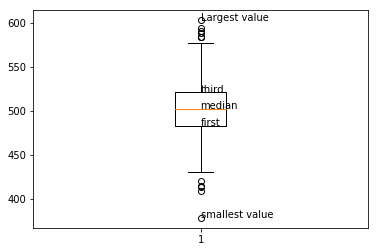

In [13]:
plt.boxplot(data)
plt.annotate('Largest value',[1,np.max(data)])
plt.annotate('third',[1,np.percentile(data,75)])
plt.annotate('first',[1,np.percentile(data,25)])
plt.annotate('median',[1,np.median(data)])
plt.annotate('smallest value',[1,np.min(data)])
plt.show()

In [16]:
k = 3
n =9
perms = np.math.factorial(n)/np.math.factorial(n-k)
print('There are',perms,'different ways that',n,'wells can be split into',k,'top three producing wells.')

There are 504.0 different ways that 9 wells can be split into 3 top three producing wells.


In [17]:
combs = np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k))
print(combs)

84.0


In [21]:
df = pd.DataFrame({'Well Type':['Gas wells','Oil wells','Total Wells',})
df.set_index('Well Type')

SyntaxError: invalid syntax (<ipython-input-21-ba4cb30bd31f>, line 1)

In [22]:
n = 120
X = 8.3
sd = 0.4
ss.norm.interval(.95, loc=X,scale=sd/np.sqrt(n))

(8.228432234251315, 8.3715677657486864)

In [23]:
ss.norm.interval(.99, loc=X,scale=sd/np.sqrt(n))

(8.2059440124108978, 8.3940559875891037)

In [24]:
ci = 8.57
z_sig = ci - X
z = z_sig*np.sqrt(n)/sd
1-(1-ss.norm.cdf(z))*2

0.99999999999985789

In [25]:
z_sig = 0.07
z = ss.norm.ppf(.975)
n = (z*sd/z_sig)**2
print(np.ceil(n))


126.0


In [26]:
z = ss.norm.ppf(.995)
n = (z*sd/z_sig)**2
print(np.ceil(n))


217.0


In [27]:
n = 80
X = 42

def binom_CI(n,X,alpha):
    n_hat = n+4
    p_hat = (X+2) / n_hat
    
    z = ss.norm.ppf(1-alpha/2)
    
    ci = z*np.sqrt(p_hat*(1-p_hat)/n_hat)

    return np.array([p_hat-ci, p_hat+ci])


alpha = 1 - 0.95
binom_CI(n,X,alpha)

array([ 0.41700602,  0.63061303])

In [29]:
alpha  = 1 - 0.9
binom_CI(n,X,alpha)

array([ 0.4341772 ,  0.61344185])

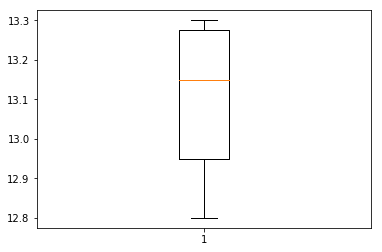

In [30]:
X = np.array([13.1,13.3,12.9,12.8,13.2,13.3])
plt.boxplot(X)
plt.show()

In [31]:
n = len(X)
mean = np.mean(X)
sd = np.std(X)
df = n-1
alpha = 0.95
ss.t.interval(alpha, df, mean, ss.sem(X))

(12.879868522974609, 13.32013147702539)